<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Desafio_Teste_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio ONG**

Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

As pessoas desse experimento só verão 1 vídeo cada
Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal
As amostras são aleatórias e sem viéses sistematicos
Objetivo: Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção

Experimento: 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção. Os vídeos são idênticos com exceção dos animais mostrados:

- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?

Reposta: Vamos começar importando as bibliotecas que serão utilizadas

## **Importando os dados**

In [5]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Funções estatísticas
import scipy.stats as st

Agora vamos importar os dados referente aos testes

In [2]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/cachorro_gato.csv')

# Observando os primeiro registros
df.head()

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


Levaremos em consideração que:

- 0 = cachorros
- 1 = gatos

## **Análise descritiva dos dados**

Para entendermos melhor os nossos dados, vamos realizar uma analise começando por um resumo estatistico dos nossos dados agrupados pela coluna grupo

In [ ]:
# Resumo estatístico
df.groupby('grupo').describe()

Unnamed: 0                                                           \
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0   
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

Alguns pontos importantes:

- Temos 253 registros de gatos e 247 de cachorros
- A média de quem viu video de gatos é um pouco maior de quem viu o video dos cachorros
- Tanto gatos como cachorros apresentam um desvio padrão bem semelhantes
- Gatos e cachorros apresentam uma média bem proximo da mediana, o que indica que eles apresentam uma distribuição proxima a uma normal
- Os gatos apresentam uma media e mediana maior que os cachorros

In [ ]:
# Observando as dimensões
df.shape

(500, 3)

Agora vamos confirmar a ocorrencia de cada registro na coluna grupo

In [ ]:
# Contando os valores
df['grupo'].value_counts()

Podemos observar que existem realmente 500 registros, mas temos 253 registros do tipo 0 e 247 registros do tipo 1, dito isso vamos separar os registros da seguinte forma:

- Grupo 0 serão referentes aos **cachorros**
- Grupo 1 referente aos **gatos**

Dito isso vamos realizar uma separação

In [7]:
# Criando novos DataFrames com base no valor da coluna 'grupo'
df_dog = df[df['grupo'] == 0]
df_cat = df[df['grupo'] == 1]

# Observando a divisão dos dados
df_dog['grupo'].value_counts(), df_cat['grupo'].value_counts()

(0    253
 Name: grupo, dtype: int64,
 1    247
 Name: grupo, dtype: int64)

Podemos observar que a nossa divisão foi realizada com sucesso

Agora vamos observar um histograma desses novos dataframes

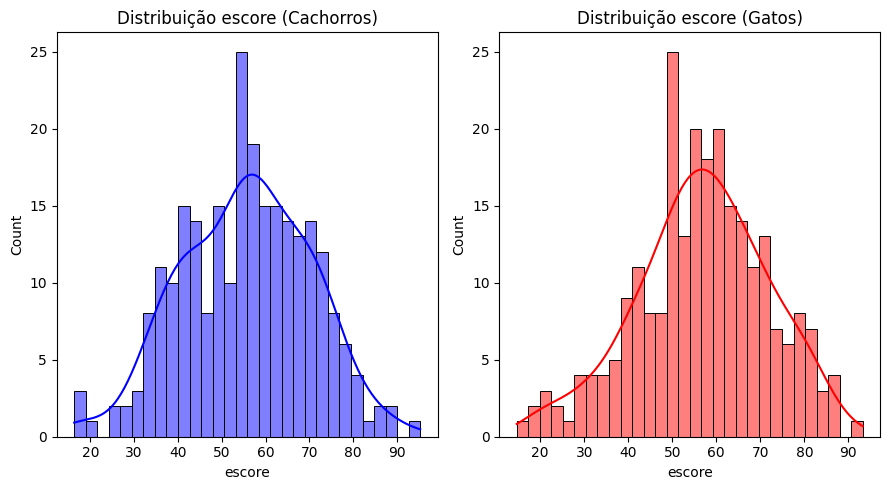

In [18]:
# Criando os gráficos
plt.figure(figsize=(9, 5))

# Gráfico para cachorros
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
sns.histplot(df_dog['escore'], kde=True, color='blue', bins = 30)
plt.title("Distribuição escore (Cachorros)")

# Gráfico para gatos
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
sns.histplot(df_cat['escore'], kde=True, color='red', bins = 30)
plt.title("Distribuição escore (Gatos)")

# Evitando sobreposição dos gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Dessa forma podemos perceber que ambas as disitrbuições se aproxima de uma distribuição normal

## **Teste de Hipóteses**

Agora vamos aplicar o teste propriamente dito, então vamos começar definindo as hipoteses

Hipóteses:

H0: média de gato = média de cachorro

Ha: média de gato ≠ média de cachorro

Estamos diante de um teste bicaudal e estamos comparando medias de duas amostras independentes

Como não conhecemos o desvio populacional e temos que comparar duas variaveis independententes poderemos utilizar o teste t

In [21]:
# Realizando o teste t de Student para duas amostras independentes
resultado_teste = st.ttest_ind(df_cat['escore'], df_dog['escore'], equal_var=False)

# Extraindo o valor-p do resultado do teste
valor_p = resultado_teste.pvalue

# Nível de significância
alpha = 0.05

# Conclusões
if valor_p < alpha:
    print("Rejeitar H0: As médias das duas amostras são estatisticamente diferentes.")
else:
    print("Falha em rejeitar H0: As médias das duas amostras NÃO são estatisticamente diferentes.")

Falha em rejeitar H0: As médias das duas amostras NÃO são estatisticamente diferentes.


Segundo nosso teste de hipotese e considerando um nivel de significancia de 0,05 falhamos em rejeitar H0, logo podemos concluir que existem evidencias a favor de que as médias de gatos e cachorros são iguais